# Пролистай вниз, код с ошибкой внизу

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 

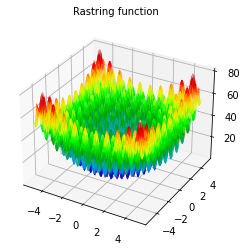

In [44]:
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 
A = 10
n = 2

Z = (X**2 - A * np.cos(2 * np.pi * X)) + \
  (Y**2 - A * np.cos(2 * np.pi * Y)) + A * n
 
fig = plt.figure() 
ax = fig.gca(projection='3d') 
plt.title('Rastring function', size=10)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    
# plt.savefig('rastrigin_graph.png')
plt.show()

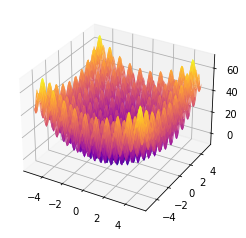

In [9]:
def rastrigin(*X, **kwargs):
    A = kwargs.get('A', 10)
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

if __name__ == '__main__':
    X = np.linspace(-5.12, 5.12, 100)    
    Y = np.linspace(-5.12, 5.12, 100)    

    X, Y = np.meshgrid(X, Y)

    Z = rastrigin(X, Y, A=10)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0.08, antialiased=True)    
    plt.savefig('rastrigin.png')

In [10]:
from scipy.optimize import dual_annealing

func = lambda x: np.sum(x*x - 10*np.cos(2*np.pi*x)) + 10*np.size(x)
lw = [-5.12] * 10
up = [5.12] * 10
ret = dual_annealing(func, bounds=list(zip(lw, up)))
ret.x

array([-3.29693746e-09, -5.29861479e-09, -5.01767887e-09, -4.03362607e-09,
       -6.18138066e-09, -6.04701291e-09, -6.11880625e-09, -5.89105907e-09,
       -2.32729544e-09, -7.56831889e-10])

### Definition of the problem

In [30]:
import openturns as ot
import openturns.viewer as viewer
import numpy as np
ot.Log.Show(ot.Log.NONE)


def rastriginPy(X):
    A = 10.0
    delta = [x**2 - A * np.cos(2 * np.pi * x) for x in X]
    y = A + sum(delta)
    return [y]


dim = 2
rastrigin = ot.PythonFunction(dim, 1, rastriginPy)
print(rastrigin([1.0, 1.0]))

[-8]


### Making rastrigin into a MemoizeFunction will make it recall all evaluated points.

In [31]:
rastrigin = ot.MemoizeFunction(rastrigin)

### This example is academic and the point achieving the global minimum of the function is known.

In [32]:
xexact = [0.0] * dim
print(xexact)

[0.0, 0.0]


### The optimization bounds must be specified.

In [46]:
lowerbound = [-4.4] * dim
upperbound = [5.12] * dim
bounds = ot.Interval(lowerbound, upperbound)

### Plot the iso-values of the objective function

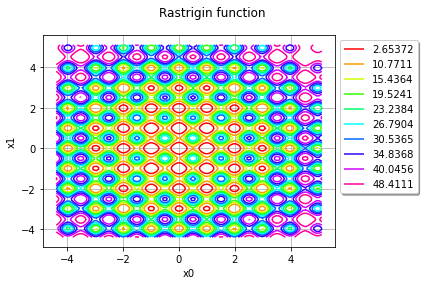

In [47]:
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
view = viewer.View(graph, legend_kw={
                   'bbox_to_anchor': (1, 1), 'loc': "upper left"})
view.getFigure().tight_layout()

We see that the Rastrigin function has several local minima. However, there is only one single global minimum at \vect{x}^\star=(0, 0).

### Create the problem and set the optimization algorithm

In [48]:
problem = ot.OptimizationProblem(rastrigin)

In [49]:
# We use the Cobyla algorithm and run it from multiple starting points selected by a LowDiscrepancyExperiment.

size = 64
distribution = ot.ComposedDistribution(
    [ot.Uniform(lowerbound[0], upperbound[0])] * dim)
experiment = ot.LowDiscrepancyExperiment(
    ot.SobolSequence(), distribution, size)
solver = ot.MultiStart(ot.Cobyla(problem), experiment.generate())

### Visualize the starting points of the optimization algorithm

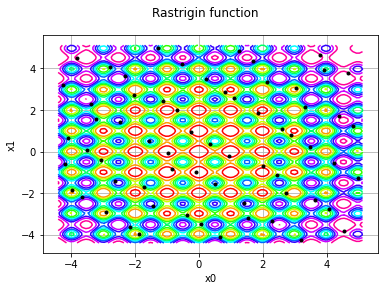

In [50]:
startingPoints = solver.getStartingSample()
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
cloud = ot.Cloud(startingPoints)
cloud.setPointStyle("bullet")
cloud.setColor("black")
graph.add(cloud)
graph.setLegends([""])
# sphinx_gallery_thumbnail_number = 2
view = viewer.View(graph)

We see that the starting points are well spread accross the input domain of the function.

### Solve the optimization problem

In [51]:
solver.run()
result = solver.getResult()
xoptim = result.getOptimalPoint()
print(xoptim)

[2.94029e-06,6.14939e-06]


In [52]:
xexact

[0.0, 0.0]

We can see that the solver found a very accurate approximation of the exact solution.

### Analyze the optimization process

In [53]:
result.getEvaluationNumber()

41

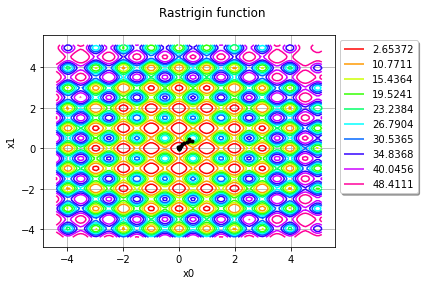

In [54]:
inputSample = result.getInputSample()
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
cloud = ot.Cloud(inputSample)
cloud.setPointStyle("bullet")
cloud.setColor("black")
graph.add(cloud)
view = viewer.View(graph, legend_kw={
                   'bbox_to_anchor': (1, 1), 'loc': "upper left"})
view.getFigure().tight_layout()

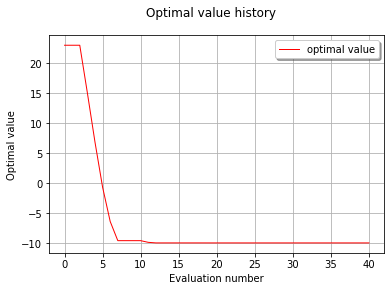

In [55]:
graph = result.drawOptimalValueHistory()
view = viewer.View(graph)

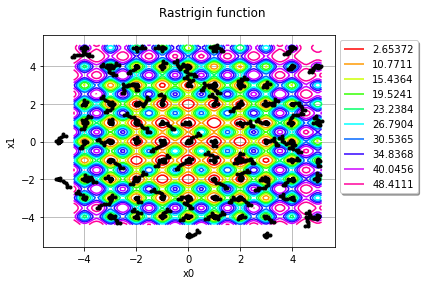

In [56]:
inputSample = rastrigin.getInputHistory()
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
cloud = ot.Cloud(inputSample)
cloud.setPointStyle("bullet")
cloud.setColor("black")
graph.add(cloud)
view = viewer.View(graph, legend_kw={
                   'bbox_to_anchor': (1, 1), 'loc': "upper left"})
view.getFigure().tight_layout()

In [57]:
# How many times did all Cobyla instances combined call rastrigin?

rastrigin.getInputHistory().getSize()

4654

## Ссылки:

https://openturns.github.io/openturns/latest/auto_numerical_methods/optimization/plot_optimization_rastrigin.html

https://pythonhosted.org/ecspy/tutorial.html

https://jamesmccaffrey.wordpress.com/2018/07/27/graphing-the-rastrigin-function-using-python/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html

In [34]:
import numpy as np
import math

In [37]:
def rastrigin(*X, **kwargs):
    A = kwargs.get('A', 10)
    return A*len(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

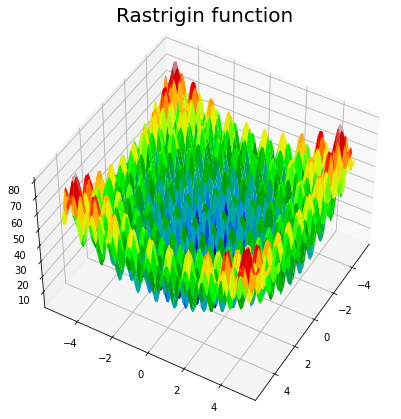

In [46]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[10, 7])
ax = fig.gca(projection='3d') 
ax.view_init(45, 30)

X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y)

Z = rastrigin(X, Y, A=10)

ax.plot_surface(X, Y, Z, cmap=cm.nipy_spectral)  
plt.title('Rastrigin function', size=20)
plt.show()

In [39]:
from scipy.optimize import minimize

In [42]:
x0 = np.random.uniform(low=-5, high=5, size=(1,))

In [43]:
res = minimize(rastrigin, x0, method='nelder-mead', options={'xtol':1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 3.979831
         Iterations: 27
         Function evaluations: 54


In [62]:
res

 final_simplex: (array([[ 3.33066907e-16],
       [-5.25523529e-09]]), array([0.00000000e+00, 5.32907052e-15]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 60
           nit: 30
        status: 0
       success: True
             x: array([3.33066907e-16])

In [63]:
res.x

array([3.33066907e-16])

In [64]:
rastrigin(res.x)

array([0.])

In [65]:
res.nit

30

# Смотри тут, ниже

In [72]:
def rastrigin0(X):
    A = 10
    return A*len(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

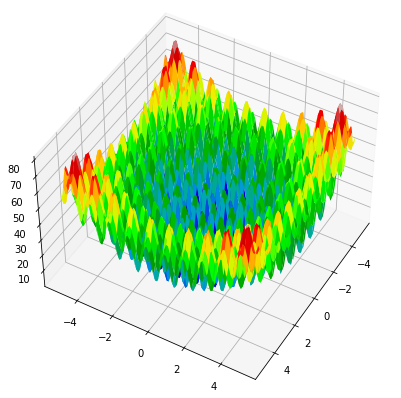

In [74]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[10, 7])
ax = fig.gca(projection='3d') 
ax.view_init(45, 30)

X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y)

Z = rastrigin0([X, Y])

ax.plot_surface(X, Y, Z, cmap=cm.nipy_spectral)    
plt.show()

In [75]:
from scipy.optimize import minimize

In [76]:
x0 = np.random.uniform(low=-5, high=5, size=(2,))

In [77]:
x0

array([ 1.69766845, -4.32306933])

In [78]:
res = minimize(rastrigin, x0, method='nelder-mead', options={'xtol':1e-8, 'disp': True})

ValueError: setting an array element with a sequence.

In [ ]:
itList = [];
resList = [];

for kk in range(100):
    
